<a href="https://colab.research.google.com/github/jeff-ai-ml/genai-langgraph/blob/main/Exercise_3_Multi_Node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 379.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 4.5 MB/s eta 0:00:00


In [91]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [92]:
class AgentState(TypedDict):
  name : str
  age : str
  skills : list
  message : str

In [93]:
def node_one(state: AgentState) -> AgentState:
  """ This the node one which process Name with Greeting message """
  state["message"] = f"{state['name']} welcome to the system! "
  return state


In [94]:
def node_two(state: AgentState) -> AgentState:
  """ This is the node two which adds age to the message """
  state["message"] = state["message"] + f" You are {state['age']} years old"
  return state


In [105]:
def node_three(state: AgentState) -> AgentState:
  """This is the node three which adds skills to the message"""
  state["message"] = state["message"] + f" You have skills in : {','.join(state['skills']) }"
  return state

In [107]:
graph = StateGraph(AgentState)
graph.add_node("first node", node_one)
graph.set_entry_point("first node")
graph.add_node("second node", node_two)
graph.add_node("third node", node_three)
graph.set_entry_point("first node")
graph.add_edge("first node", "second node")
graph.add_edge("second node", "third node")
graph.set_finish_point("third node")

app = graph.compile()

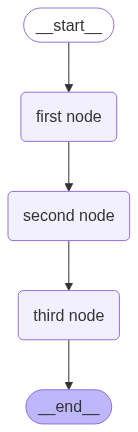

In [108]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [109]:
result = app.invoke({"name": "Ted", "age": "22", "skills": ["Python", "ML", "GenAI"]})

result["message"]

'Ted welcome to the system!  You are 22 years old You have skills in : Python,ML,GenAI'